# PB——Distribution

<b>研究目的：</b>  
观察PB分位数与时间轴的连续性 

<b>研究内容：</b>  
画出PB分位数图


# 1 数据准备

## 1.1 日期列表获取

In [1]:
#coding: utf-8

# 导入库
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from jqdata import *
# 设置起始时间和股票池
begin = "2019-01-01"
end = "2019-03-05"
#["000001.SZ","000002.SZ","000003.SZ","000005.SZ","000006.SZ","000007.SZ","000008.SZ","000009.SZ","000010.SZ"]
Tdays = get_trade_days(begin,end)
Qt = [0.8,0.9,0.95]
Quantiles = pd.DataFrame(index =  Tdays, columns = Qt)
print(Tdays)

[datetime.date(2019, 1, 2) datetime.date(2019, 1, 3)
 datetime.date(2019, 1, 4) datetime.date(2019, 1, 7)
 datetime.date(2019, 1, 8) datetime.date(2019, 1, 9)
 datetime.date(2019, 1, 10) datetime.date(2019, 1, 11)
 datetime.date(2019, 1, 14) datetime.date(2019, 1, 15)
 datetime.date(2019, 1, 16) datetime.date(2019, 1, 17)
 datetime.date(2019, 1, 18) datetime.date(2019, 1, 21)
 datetime.date(2019, 1, 22) datetime.date(2019, 1, 23)
 datetime.date(2019, 1, 24) datetime.date(2019, 1, 25)
 datetime.date(2019, 1, 28) datetime.date(2019, 1, 29)
 datetime.date(2019, 1, 30) datetime.date(2019, 1, 31)
 datetime.date(2019, 2, 1) datetime.date(2019, 2, 11)
 datetime.date(2019, 2, 12) datetime.date(2019, 2, 13)
 datetime.date(2019, 2, 14) datetime.date(2019, 2, 15)
 datetime.date(2019, 2, 18) datetime.date(2019, 2, 19)
 datetime.date(2019, 2, 20) datetime.date(2019, 2, 21)
 datetime.date(2019, 2, 22) datetime.date(2019, 2, 25)
 datetime.date(2019, 2, 26) datetime.date(2019, 2, 27)
 datetime.date(20

In [3]:
# 计算分位数

for  d in Tdays:
    my_stocks = get_index_stocks('399707.XSHE', date=d)
    qt = query(valuation.code, valuation.pb_ratio).filter(valuation.code.in_(my_stocks))
    df = get_fundamentals(qt, date=d)
    # 计算昨天市场所有股票PB值的分位数
    #factor_quantiles = df.dropna().quantile(Qt)
    print type(factor_quantiles),factor_quantiles.head()
    factor_quantiles = pd.DataFrame(factor_quantiles)
    for i,flavor in enumerate(factor_quantiles.values):
        Quantiles.ix[d,i] = flavor
print Quantiles.tail()

<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.42206
0.90   1.55188
0.95   1.95626
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.49092
0.90   1.59240
0.95   2.01732
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.62080
0.90   1.75236
0.95   2.22018
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.61474
0.90   1.76408
0.95   2.24780
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.62750
0.90   1.77696
0.95   2.30536
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.62824
0.90   1.77002
0.95   2.27942
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.55342
0.90   1.70516
0.95   2.20082
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.55326
0.90   1.71072
0.95   2.21680
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.53812
0.90   1.68998
0.95   2.19238
<class 'pandas.core.frame.DataFrame'>       pb_ratio
0.80   1.57372
0.90   1.73008
0.95   2.24332
<class 'pandas.core.

In [39]:
Quantiles['today_0.8']=Quantiles.iloc[-1,0][0]
Quantiles['today_0.9']=Quantiles.iloc[-1,1][0]
Quantiles['today_0.95']=Quantiles.iloc[-1,2][0]

## 1.2 绘图

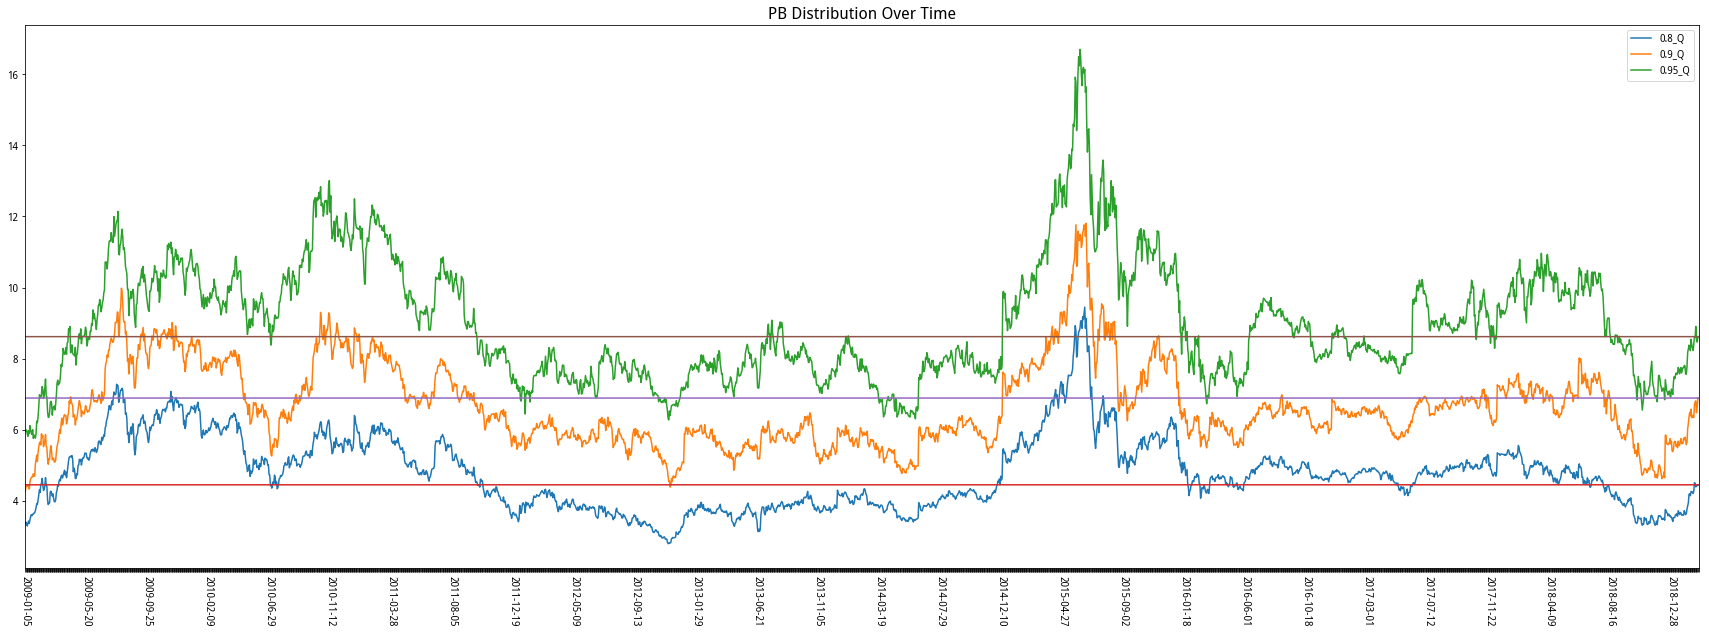

In [42]:
plt.figure(figsize=(30,10))
# print(Quantiles.iloc[:,0])
p1 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,0])
p2 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,1])
p3 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,2])
p4 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,3])
p5 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,4])
p6 = plt.plot(range(len(Quantiles.index)),Quantiles.iloc[:,5])

plt.title("PB Distribution Over Time", fontsize=16)
x_tick = [] 
for i in range(len(Quantiles.index)): 
    if i%90 == 0:
        x_tick.append(Quantiles.index[i])
    else: x_tick.append("") 
plt.legend(['0.8_Q','0.9_Q','0.95_Q'])
plt.xticks(range(len(x_tick)), x_tick,rotation = -90)
plt.xlim(0,len(x_tick))
plt.show()